In [1]:
import pandas as pd
import numpy as np
import timeit

In [2]:
start = timeit.default_timer()

df_15 = pd.read_csv('Medicare_Provider_Util_Payment_PUF_CY2015.txt', sep = '\t', header = 0)
df_15['year'] = '2015'
df_15.drop(df_15.index == 0, inplace = True)

stop = timeit.default_timer()
print (stop - start)

df_15.head()

/Users/michaelli/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


106.476214886


,npi,nppes_provider_last_org_name,nppes_provider_first_name,nppes_provider_mi,nppes_credentials,nppes_provider_gender,nppes_entity_code,nppes_provider_street1,nppes_provider_street2,nppes_provider_city,...,hcpcs_description,hcpcs_drug_indicator,line_srvc_cnt,bene_unique_cnt,bene_day_srvc_cnt,average_Medicare_allowed_amt,average_submitted_chrg_amt,average_Medicare_payment_amt,average_Medicare_standard_amt,year
2,1003000126,ENKESHAFI,ARDALAN,NaN,M.D.,M,I,900 SETON DR,NaN,CUMBERLAND,...,Hospital observation care typically 50 minutes,N,18.0,18.0,18.0,135.850000,614.000000,100.958889,102.348889,2015
3,1003000126,ENKESHAFI,ARDALAN,NaN,M.D.,M,I,900 SETON DR,NaN,CUMBERLAND,...,"Initial hospital inpatient care, typically 30 ...",N,59.0,58.0,59.0,101.365085,333.288136,79.469661,80.859831,2015
4,1003000126,ENKESHAFI,ARDALAN,NaN,M.D.,M,I,900 SETON DR,NaN,CUMBERLAND,...,"Initial hospital inpatient care, typically 50 ...",N,132.0,130.0,132.0,139.010455,356.492424,107.933409,107.969621,2015
5,1003000126,ENKESHAFI,ARDALAN,NaN,M.D.,M,I,900 SETON DR,NaN,CUMBERLAND,...,"Initial hospital inpatient care, typically 70 ...",N,220.0,215.0,220.0,205.185955,631.186364,157.908955,160.930409,2015
6,1003000126,ENKESHAFI,ARDALAN,NaN,M.D.,M,I,900 SETON DR,NaN,CUMBERLAND,...,"Subsequent hospital inpatient care, typically ...",N,38.0,18.0,38.0,39.554737,100.842105,31.015789,30.990000,2015


In [4]:
df_15.columns.values

array(['npi', 'nppes_provider_last_org_name', 'nppes_provider_first_name',
       'nppes_provider_mi', 'nppes_credentials', 'nppes_provider_gender',
       'nppes_entity_code', 'nppes_provider_street1',
       'nppes_provider_street2', 'nppes_provider_city',
       'nppes_provider_zip', 'nppes_provider_state',
       'nppes_provider_country', 'provider_type',
       'medicare_participation_indicator', 'place_of_service',
       'hcpcs_code', 'hcpcs_description', 'hcpcs_drug_indicator',
       'line_srvc_cnt', 'bene_unique_cnt', 'bene_day_srvc_cnt',
       'average_Medicare_allowed_amt', 'average_submitted_chrg_amt',
       'average_Medicare_payment_amt', 'average_Medicare_standard_amt',
       'year'], dtype=object)

In [6]:
df_12_summary = pd.read_excel('Medicare-Physician-and-Other-Supplier-NPI-Aggregate-CY2012.xlsx', sheetname= 'DATA', header= 0)

In [7]:
df_12_summary.columns.values

array([u'NPI', u'NPPES Provider Last Name / Organization Name',
       u'NPPES Provider First Name', u'NPPES Provider Middle Initial',
       u'NPPES Credentials', u'NPPES Provider Gender',
       u'NPPES Entity Code', u'NPPES Provider Street Address 1',
       u'NPPES Provider Street Address 2', u'NPPES Provider City',
       u'NPPES Provider Zip Code', u'NPPES Provider State',
       u'NPPES Provider Country ', u'Provider Type',
       u'Medicare Participation Indicator', u'Number of HCPCS',
       u'Number of Services', u'Number of Unique Beneficiaries',
       u'Total Submitted Charges', u'Total Medicare Allowed Amount',
       u'Total Medicare Payment Amount', u'Drug Suppress Indicator',
       u'Number of HCPCS Associated With Drug Services',
       u'Number of Drug Services',
       u'Number of Unique Beneficiaries With Drug Services',
       u'Total Drug Submitted Charges',
       u'Total Drug Medicare Allowed Amount',
       u'Total Drug Medicare Payment Amount',
       u'Medi

In [30]:
df_12_summary['Number of Beneficiaries Age Less 65 '].fillna(0, inplace = True)
df_12_summary['Number of Beneficiaries Age 65 to 74'].fillna(0, inplace = True)
df_12_summary['Number of Beneficiaries Age 75 to 84'].fillna(0, inplace = True)
df_12_summary['Number of Beneficiaries Age Greater 84'].fillna(0, inplace = True)

In [34]:
df_12_summary['age_perc'] = df_12_summary['Number of Beneficiaries Age Less 65 '] / (df_12_summary['Number of Beneficiaries Age Less 65 '] + df_12_summary['Number of Beneficiaries Age 65 to 74'] + df_12_summary['Number of Beneficiaries Age 75 to 84'] + df_12_summary['Number of Beneficiaries Age Greater 84'])

In [35]:
df_12_summary['age_perc'].describe()

count    830688.000000
mean          0.195689
std           0.225995
min           0.000000
25%           0.022355
50%           0.139785
75%           0.255109
max           1.000000
Name: age_perc, dtype: float64

In [39]:
df_12_summary.to_csv('Medicare-Physician-and-Other-Supplier-NPI-Aggregate-CY2012.csv', sep = ',', index = False, encoding='utf-8')

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt


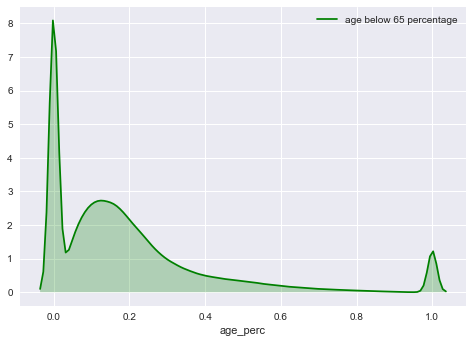

In [36]:
sns.distplot(df_12_summary['age_perc'], hist=False, color="g", kde_kws={"shade": True, 'label': 'age below 65 percentage'})
plt.show()

In [23]:
below65 =sum(df_12_summary['Number of Beneficiaries Age Less 65 '].dropna())
above65 = sum(df_12_summary['Number of Beneficiaries Age 65 to 74'].dropna()) + sum(df_12_summary['Number of Beneficiaries Age 75 to 84'].dropna()) + sum(df_12_summary['Number of Beneficiaries Age Greater 84'].dropna())
print below65/above65

0.207139562196


In [33]:
perc_below_65 = sum(df_12_summary['Number of Beneficiaries Age Less 65 '].dropna())/ sum(df_12_summary['Number of Beneficiaries Age 65 to 74'].dropna() + df_12_summary['Number of Beneficiaries Age 75 to 84'].dropna() + df_12_summary['Number of Beneficiaries Age Greater 84'].dropna())
perc_below_65

0.20713956219560486

In [3]:
start = timeit.default_timer()

df_14 = pd.read_csv('Medicare_Provider_Util_Payment_PUF_CY2014.txt', sep = '\t', header = 0)
df_14['year'] = '2014'
df_14.drop(df_14.index == 0, inplace = True)

stop = timeit.default_timer()
print (stop - start)

df_14.head()

87.2624709606


,npi,nppes_provider_last_org_name,nppes_provider_first_name,nppes_provider_mi,nppes_credentials,nppes_provider_gender,nppes_entity_code,nppes_provider_street1,nppes_provider_street2,nppes_provider_city,...,hcpcs_description,hcpcs_drug_indicator,line_srvc_cnt,bene_unique_cnt,bene_day_srvc_cnt,average_Medicare_allowed_amt,average_submitted_chrg_amt,average_Medicare_payment_amt,average_Medicare_standard_amt,year
2,1003000126,ENKESHAFI,ARDALAN,NaN,M.D.,M,I,900 SETON DR,NaN,CUMBERLAND,...,"Initial hospital inpatient care, typically 70 ...",N,98.0,98.0,98.0,207.79,611.0,152.551224,153.306837,2014
3,1003000126,ENKESHAFI,ARDALAN,NaN,M.D.,M,I,900 SETON DR,NaN,CUMBERLAND,...,"Subsequent hospital inpatient care, typically ...",N,104.0,65.0,104.0,40.10,119.0,30.835385,30.708269,2014
4,1003000126,ENKESHAFI,ARDALAN,NaN,M.D.,M,I,900 SETON DR,NaN,CUMBERLAND,...,"Subsequent hospital inpatient care, typically ...",N,1418.0,596.0,1418.0,73.66,217.0,56.297757,56.098209,2014
5,1003000126,ENKESHAFI,ARDALAN,NaN,M.D.,M,I,900 SETON DR,NaN,CUMBERLAND,...,"Subsequent hospital inpatient care, typically ...",N,175.0,104.0,175.0,106.12,312.0,82.398171,81.612743,2014
6,1003000126,ENKESHAFI,ARDALAN,NaN,M.D.,M,I,900 SETON DR,NaN,CUMBERLAND,...,"Hospital discharge day management, 30 minutes ...",N,330.0,316.0,330.0,74.14,217.0,55.681242,55.199758,2014


In [4]:
start = timeit.default_timer()

df_13 = pd.read_csv('Medicare_Provider_Util_Payment_PUF_CY2013.txt', sep = '\t', header = 0)
df_13['year'] = '2013'
df_13.drop(df_13.index == 0, inplace = True)

stop = timeit.default_timer()
print (stop - start)

df_13.head()

93.2730619907


,NPI,NPPES_PROVIDER_LAST_ORG_NAME,NPPES_PROVIDER_FIRST_NAME,NPPES_PROVIDER_MI,NPPES_CREDENTIALS,NPPES_PROVIDER_GENDER,NPPES_ENTITY_CODE,NPPES_PROVIDER_STREET1,NPPES_PROVIDER_STREET2,NPPES_PROVIDER_CITY,...,LINE_SRVC_CNT,BENE_UNIQUE_CNT,BENE_DAY_SRVC_CNT,AVERAGE_MEDICARE_ALLOWED_AMT,STDEV_MEDICARE_ALLOWED_AMT,AVERAGE_SUBMITTED_CHRG_AMT,STDEV_SUBMITTED_CHRG_AMT,AVERAGE_MEDICARE_PAYMENT_AMT,STDEV_MEDICARE_PAYMENT_AMT,year
2,1003000126,ENKESHAFI,ARDALAN,NaN,M.D.,M,I,900 SETON DR,NaN,CUMBERLAND,...,96.0,95.0,96.0,201.32,0.0,524.604167,141.760470,155.901146,19.510660,2013
3,1003000126,ENKESHAFI,ARDALAN,NaN,M.D.,M,I,900 SETON DR,NaN,CUMBERLAND,...,61.0,47.0,61.0,38.74,0.0,97.000000,29.291637,30.065246,3.891932,2013
4,1003000126,ENKESHAFI,ARDALAN,NaN,M.D.,M,I,900 SETON DR,NaN,CUMBERLAND,...,777.0,381.0,777.0,71.27,0.0,187.594595,49.282122,55.091351,7.631141,2013
5,1003000126,ENKESHAFI,ARDALAN,NaN,M.D.,M,I,900 SETON DR,NaN,CUMBERLAND,...,170.0,106.0,170.0,102.76,0.0,271.976471,69.870801,80.641235,4.303711,2013
6,1003000126,ENKESHAFI,ARDALAN,NaN,M.D.,M,I,900 SETON DR,NaN,CUMBERLAND,...,219.0,208.0,219.0,72.09,0.0,201.004566,39.390736,55.650457,7.601205,2013


In [5]:
start = timeit.default_timer()

df_12 = pd.read_csv('Medicare_Provider_Util_Payment_PUF_CY2012.txt', sep = '\t', header = 0)
df_12['year'] = '2012'
df_12.drop(df_12.index == 0, inplace = True)

stop = timeit.default_timer()
print (stop - start)

df_12.head()

94.3969039917


,NPI,NPPES_PROVIDER_LAST_ORG_NAME,NPPES_PROVIDER_FIRST_NAME,NPPES_PROVIDER_MI,NPPES_CREDENTIALS,NPPES_PROVIDER_GENDER,NPPES_ENTITY_CODE,NPPES_PROVIDER_STREET1,NPPES_PROVIDER_STREET2,NPPES_PROVIDER_CITY,...,LINE_SRVC_CNT,BENE_UNIQUE_CNT,BENE_DAY_SRVC_CNT,AVERAGE_MEDICARE_ALLOWED_AMT,STDEV_MEDICARE_ALLOWED_AMT,AVERAGE_SUBMITTED_CHRG_AMT,STDEV_SUBMITTED_CHRG_AMT,AVERAGE_MEDICARE_PAYMENT_AMT,STDEV_MEDICARE_PAYMENT_AMT,year
2,1003000126,ENKESHAFI,ARDALAN,NaN,M.D.,M,I,900 SETON DR,NaN,CUMBERLAND,...,93.0,88.0,93.0,198.59,0.0,291.0,9.591663,158.870000,0.000000,2012
3,1003000126,ENKESHAFI,ARDALAN,NaN,M.D.,M,I,900 SETON DR,NaN,CUMBERLAND,...,111.0,83.0,111.0,38.75,0.0,58.0,0.000000,30.720721,2.929106,2012
4,1003000126,ENKESHAFI,ARDALAN,NaN,M.D.,M,I,900 SETON DR,NaN,CUMBERLAND,...,544.0,295.0,544.0,70.95,0.0,105.0,0.000000,56.655662,2.431327,2012
5,1003000126,ENKESHAFI,ARDALAN,NaN,M.D.,M,I,900 SETON DR,NaN,CUMBERLAND,...,75.0,55.0,75.0,101.74,0.0,150.0,0.000000,81.390000,0.000000,2012
6,1003000126,ENKESHAFI,ARDALAN,NaN,M.D.,M,I,900 SETON DR,NaN,CUMBERLAND,...,95.0,95.0,95.0,71.06,0.0,104.0,0.000000,55.768842,7.415500,2012


In [6]:
print df_15.shape, df_14.shape, df_13.shape, df_12.shape

(9497890, 27) (9316306, 27) (9287875, 29) (9153271, 29)


In [11]:
# convert column names to lower case
df_13.columns = df_13.columns.str.lower()
df_12.columns = df_12.columns.str.lower()

In [12]:
cols_to_keep = ['hcpcs_code', 'hcpcs_description', 'year', 'bene_unique_cnt', 'line_srvc_cnt']

df_15 = df_15[cols_to_keep]
df_14 = df_14[cols_to_keep]
df_13 = df_13[cols_to_keep]
df_12 = df_12[cols_to_keep]

In [14]:
df = df_15.append([df_14, df_13, df_12])
df.reset_index(drop = True, inplace = True)
df.head()

,hcpcs_code,hcpcs_description,year,bene_unique_cnt,line_srvc_cnt
0,99219,Hospital observation care typically 50 minutes,2015,18.0,18.0
1,99221,"Initial hospital inpatient care, typically 30 ...",2015,58.0,59.0
2,99222,"Initial hospital inpatient care, typically 50 ...",2015,130.0,132.0
3,99223,"Initial hospital inpatient care, typically 70 ...",2015,215.0,220.0
4,99231,"Subsequent hospital inpatient care, typically ...",2015,18.0,38.0


In [15]:
df.columns.values

array(['hcpcs_code', 'hcpcs_description', 'year', 'bene_unique_cnt',
       'line_srvc_cnt'], dtype=object)

In [16]:
df_cpt = df[['hcpcs_code', 'hcpcs_description', 'year', 'bene_unique_cnt', 'line_srvc_cnt']].groupby(['hcpcs_code', 'hcpcs_description', 'year'])['bene_unique_cnt', 'line_srvc_cnt'].apply(np.sum)
df_cpt.head()

bene_unique_cnt  \
hcpcs_code hcpcs_description                                  year                    
00100      Anesthesia for procedure on salivary gland with... 2012             51.0   
                                                              2013             49.0   
                                                              2014             41.0   
                                                              2015             57.0   
00102      Anesthesia for procedure to repair lip defect p... 2012             17.0   

                                                                    line_srvc_cnt  
hcpcs_code hcpcs_description                                  year                 
00100      Anesthesia for procedure on salivary gland with... 2012           53.0  
                                                              2013           51.0  
                                                              2014           41.0  
                                                              2015           60.0  
00102      Anesthesia for procedure to repair lip defect p... 2012           17.0

In [26]:
df_cpt.head(30)

bene_unique_cnt  \
hcpcs_code hcpcs_description                                  year                    
00100      Anesthesia for procedure on salivary gland with... 2012             51.0   
                                                              2013             49.0   
                                                              2014             41.0   
                                                              2015             57.0   
00102      Anesthesia for procedure to repair lip defect p... 2012             17.0   
                                                              2015            129.0   
00103      Anesthesia for procedure on eyelid                 2012          68355.0   
                                                              2013          73014.0   
                                                              2014          69295.0   
                                                              2015          69564.0   
00104      Anesthesia for electric shock treatment            2012          65980.0   
                                                              2013          65590.0   
                                                              2014          66172.0   
                                                              2015          66466.0   
00120      Anesthesia for biopsy of external middle and in... 2012           1872.0   
                                                              2013           1918.0   
                                                              2014           1815.0   
                                                              2015           2223.0   
00126      Anesthesia for incision of ear drum                2012            592.0   
                                                              2013            677.0   
                                                              2014            583.0   
                                                              2015            746.0   
00140      Anesthesia for procedure on eye                    2012          77472.0   
                                                              2013          78844.0   
                                                              2014          79811.0   
                                                              2015          83069.0   
00142      Anesthesia for lens surgery                        2012        1748035.0   
                                                              2013        1774575.0   
                                                              2014        1722848.0   
                                                              2015        1734195.0   

                                                                    line_srvc_cnt  
hcpcs_code hcpcs_description                                  year                 
00100      Anesthesia for procedure on salivary gland with... 2012           53.0  
                                                              2013           51.0  
                                                              2014           41.0  
                                                              2015           60.0  
00102      Anesthesia for procedure to repair lip defect p... 2012           17.0  
                                                              2015          130.0  
00103      Anesthesia for procedure on eyelid                 2012        70126.0  
                                                              2013        74975.0  
                                                              2014        71091.0  
                                                              2015        71318.0  
00104      Anesthesia for electric shock treatment            2012       138137.0  
                                                              2013       137756.0  
                                                              2014       140198.0  
                       

In [20]:
df_cpt.shape

(23887, 2)

In [25]:
df_cpt.index.levels[0].shape

(7028,)

In [19]:
df_cpt.to_csv('cms_groupedby_hcpcs_cpt_codes_2012_to_2015.csv', sep = ',', index = True)

In [28]:
df_cpt.describe()

,bene_unique_cnt,line_srvc_cnt
count,2.388700e+04,2.388700e+04
mean,1.418523e+05,3.773262e+05
std,1.247245e+06,3.589652e+06
min,1.100000e+01,1.100000e+01
25%,9.300000e+01,1.260000e+02
50%,9.180000e+02,1.425000e+03
75%,1.371450e+04,2.419750e+04
max,5.478054e+07,1.428629e+08


In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

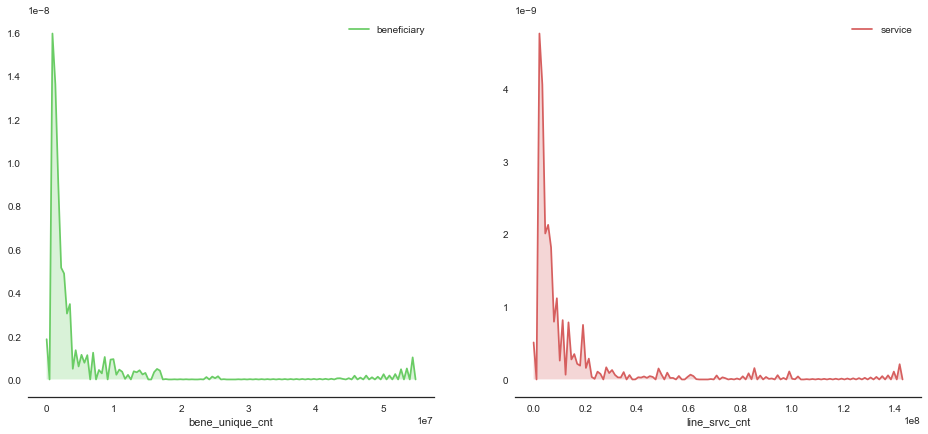

In [44]:
plt.clf()
# Set up the matplotlib figure
f, axes = plt.subplots(1, 2, figsize=(16, 7), sharex=False)
sns.despine(left=True)

sns.distplot(df_cpt['bene_unique_cnt'], hist=False, color="g", kde_kws={"shade": True, 'label': 'beneficiary'}, ax = axes[0])

sns.distplot(df_cpt['line_srvc_cnt'], hist=False, color="r", kde_kws={"shade": True, 'label' : 'service'}, ax = axes[1])

plt.show()

In [47]:
df_cpt[df_cpt['bene_unique_cnt'] > 10000000]

bene_unique_cnt  \
hcpcs_code hcpcs_description                                  year                    
36415      Insertion of needle into vein for collection of... 2012       25268761.0   
                                                              2013       25240300.0   
                                                              2014       24596466.0   
                                                              2015       23845425.0   
71010      X-ray of chest, 1 view, front                      2012       13418494.0   
                                                              2013       13221380.0   
                                                              2014       13031877.0   
                                                              2015       12973042.0   
71020      X-ray of chest, 2 views, front and side            2012       12110324.0   
                                                              2013       11706279.0   
                                                              2014       11289727.0   
                                                              2015       11307943.0   
80053      Blood test, comprehensive group of blood chemicals 2012       16198792.0   
                                                              2013       16453802.0   
                                                              2014       16486027.0   
                                                              2015       16511310.0   
80061      Blood test, lipids (cholesterol and triglycerides) 2012       13970534.0   
                                                              2013       14014866.0   
                                                              2014       13742304.0   
                                                              2015       13474271.0   
84443      Blood test, thyroid stimulating hormone (TSH)      2012       10874861.0   
                                                              2013       11039833.0   
                                                              2014       10980593.0   
                                                              2015       10893208.0   
85025      Complete blood cell count (red cells, white blo... 2012       16076386.0   
                                                              2013       16158227.0   
                                                              2014       16092356.0   
                                                              2015       16007668.0   
92014      Eye and medical examination for diagnosis and t... 2015       10039268.0   
93010      Routine electrocardiogram (EKG) using at least ... 2012       14719920.0   
                                                              2013       14545014.0   
                                                              2014       14301183.0   
                                                              2015       14500593.0   
99203      New patient office or other outpatient visit, t... 2015       10016070.0   
99212      Established patient office or other outpatient ... 2012       10775656.0   
                                                              2013       10430159.0   
99213      Established patient office or other outpatient ... 2012       52629695.0   
                                                              2013       54472471.0   
                                                              2014       54297783.0   
                                                              2015       54780540.0   
99214      Established patient office or other outpatient,... 2012       43449110.0   
                                                              2013       45812093.0   
                                                              2014       47573899.0   
                                                              2015       50149044.0   
99223      Initial hospital inpatient care, typically 70 m... 2012